# Project Python for Data Science: Austo Motor Company Data Analysis

### Let us start by importing the required libraries

In [127]:
# Read the data
df= pd.read_csv('austo_automobile+%282%29+%281%29.csv')

In [128]:
df.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV


In [129]:
# checking shape of the data
print("There are", df.shape[0], 'rows and', df.shape[1], "columns.")

There are 1581 rows and 14 columns.


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.1+ KB


In [131]:
#Checking for missing values in the data
df.isnull().sum()

Age                   0
Gender               53
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

In [132]:
#Let's check the statistical summary of the data.
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1581.0,NaN,NaN,NaN,31.922201,8.425978,22.0,25.0,29.0,38.0,54.0
Gender,1528,4,Male,1199,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Profession,1581,2,Salaried,896,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_status,1581,2,Married,1443,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,1581,2,Post Graduate,985,NaN,NaN,NaN,NaN,NaN,NaN,NaN
No_of_Dependents,1581.0,NaN,NaN,NaN,2.457938,0.943483,0.0,2.0,2.0,3.0,4.0
Personal_loan,1581,2,Yes,792,NaN,NaN,NaN,NaN,NaN,NaN,NaN
House_loan,1581,2,No,1054,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Partner_working,1581,2,Yes,868,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,1581.0,NaN,NaN,NaN,60392.220114,14674.825044,30000.0,51900.0,59500.0,71800.0,99300.0


In [133]:
# Check for unique values in the 'gender' column
df['Gender'].unique()

array(['Male', 'Femal', 'Female', nan, 'Femle'], dtype=object)

In [134]:
# Define a mapping for consistent gender values
gender_mapping = {
    'Femal': 'Female',
    'Femle': 'Female'
}

In [135]:
df['Gender'] = df['Gender'].replace(gender_mapping)

In [136]:
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [137]:
#Lets Fill Gender with the Most Frequent Value
Most_Frequent_Gender = df['Gender'].mode()[0]
df['Gender'] = df['Gender'].fillna(Most_Frequent_Gender)

In [138]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [139]:
df['Gender'].isnull().sum()

0

In [549]:
df['Gender'].value_counts()

Gender
Male      1252
Female     329
Name: count, dtype: int64

In [140]:
df['Partner_salary'].unique()

array([70700., 70300., 60700., 60200., 60500., 50800., 40400.,     0.,
       70600., 60600., 60300., 45500., 40200., 40700.,   600.,   700.,
       27800., 70000., 40100., 40900., 27000.,    nan, 40500., 50400.,
       80400., 60900., 60100., 70200., 30000., 40300., 40800., 70800.,
         900., 45000., 40600., 50700., 80500., 27700., 35800., 26600.,
       60000., 27900., 60800., 40000., 70100., 38100., 38200., 30200.,
       38500., 50900., 35100., 38700., 38300., 38900., 23200., 24700.,
       30800., 28100., 38400., 38000., 23100., 30100., 25700., 70400.,
         200., 30900., 26100., 45700.,   400., 28200., 70900., 38800.,
       45200., 26800., 60400., 30300., 25800.,   800., 38600., 24500.,
       30700., 28500., 24900., 70500., 35900., 30500., 28900., 27200.,
       45900., 25300., 35600., 25000., 25200., 26300., 35700., 23800.,
       32700., 30600., 45600., 28000., 32600., 28600., 25100., 26700.,
       24200., 25900., 22100., 25400., 28400., 28300., 25500., 24000.,
      

In [144]:
#Checking the number of 'nan' rows in 'Partner_salary' with the 'Marital_status' as Single.
df[(df['Marital_status'] == 'Single') & (df['Partner_salary'].isnull())].shape

(0, 14)

In [142]:
#Changing the 'nan' values to Zero.
df.loc[(df['Marital_status'] == 'Single') & (df['Partner_salary'].isnull()), 'Partner_salary'] = 0

In [143]:
#Let's check the null value in 'Partner_salary'.
df['Partner_salary'].isnull().sum()

90

In [145]:
#Checking the number of 'nan' rows in 'Partner_salary' with the 'Marital_status' as Married and also with 'Partner_working' as No.
df[(df['Marital_status'] == 'Married') & (df['Partner_working']=='No') & (df['Partner_salary'].isnull())].shape

(74, 14)

In [146]:
#Changing the 'nan' values to Zero.
df.loc[(df['Marital_status'] == 'Married') & (df['Partner_working']=='No') & (df['Partner_salary'].isnull()),'Partner_salary'] = 0

In [147]:
#Let's check the null value in 'Partner_salary'.
df['Partner_salary'].isnull().sum()

16

In [148]:
#Changing the 'nan' values to Zero.
df.loc[(df['Marital_status'] == 'Married') & (df['Partner_working']=='Yes') & (df['Partner_salary'].isnull()),'Partner_salary'] = 0

In [149]:
#Let's check the null value in 'Partner_salary'.
df['Partner_salary'].isnull().sum()

0

In [201]:
#Lets check the value_counts
df['Partner_salary'].value_counts()

Partner_salary
0.0        729
40500.0     29
40200.0     27
40100.0     25
40000.0     25
          ... 
45800.0      1
27300.0      1
22900.0      1
23100.0      1
35000.0      1
Name: count, Length: 149, dtype: int64

In [151]:
#Once again lets check the missing values in the data
df.isnull().sum()

Age                 0
Gender              0
Profession          0
Marital_status      0
Education           0
No_of_Dependents    0
Personal_loan       0
House_loan          0
Partner_working     0
Salary              0
Partner_salary      0
Total_salary        0
Price               0
Make                0
dtype: int64

In [260]:
#Checking for duplicate entries in the data
df.duplicated().sum()

0

# Exploratory Data Analysis (EDA)

## Univariate Analysis

In [174]:
# let's start by installing plotly
#!pip install plotly
# importing plotly
import plotly.express as px

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



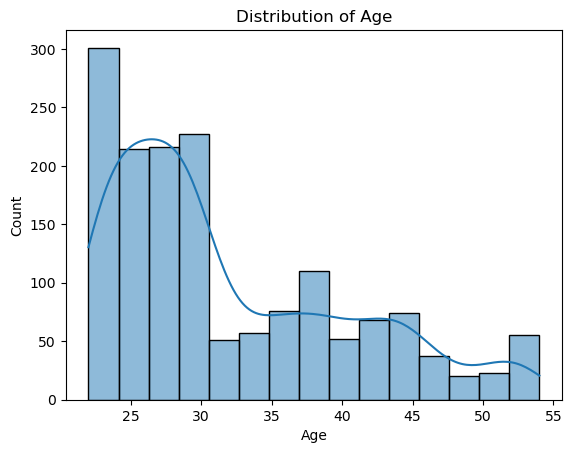

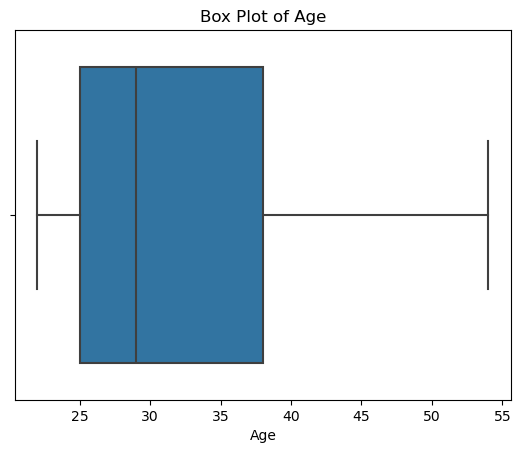

In [196]:
sns.histplot(df['Age'],kde=True)
plt.title('Distribution of Age')
plt.show()
sns.boxplot(x=df['Age'])
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.show()

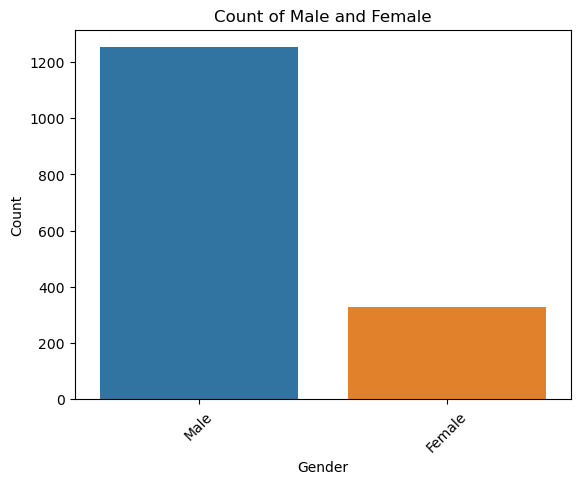

In [178]:
sns.countplot(x=df['Gender'])
plt.title('Count of Male and Female')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

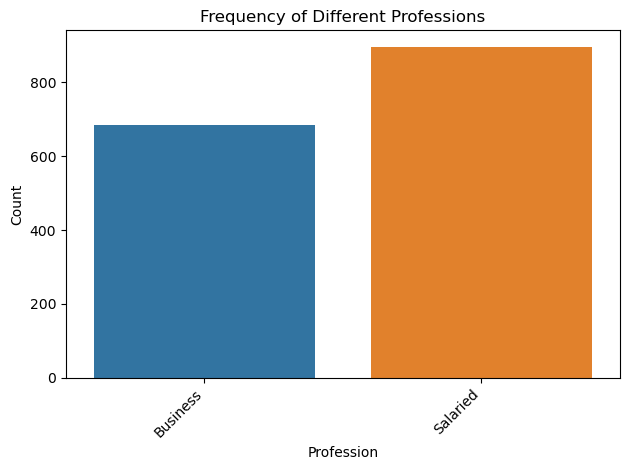

In [552]:
sns.countplot(x=df['Profession'])
plt.title('Frequency of Different Professions')
plt.xlabel('Profession')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout() 
plt.show()

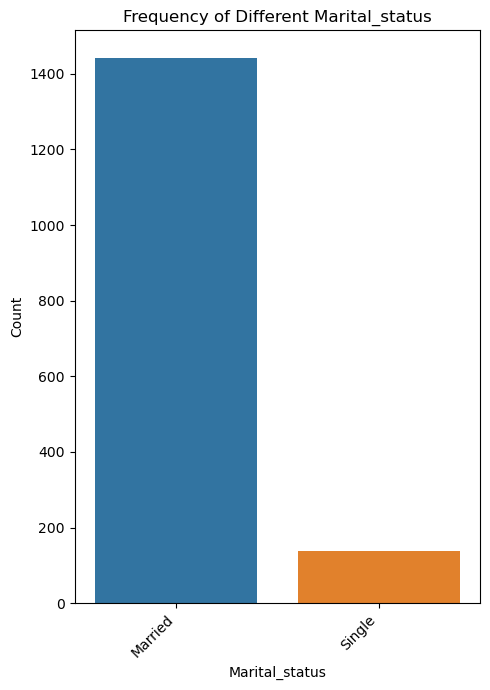

In [555]:
plt.figure(figsize=(5,7))
sns.countplot(x=df['Marital_status'])
plt.title('Frequency of Different Marital_status')
plt.xlabel('Marital_status')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout() 
plt.show()

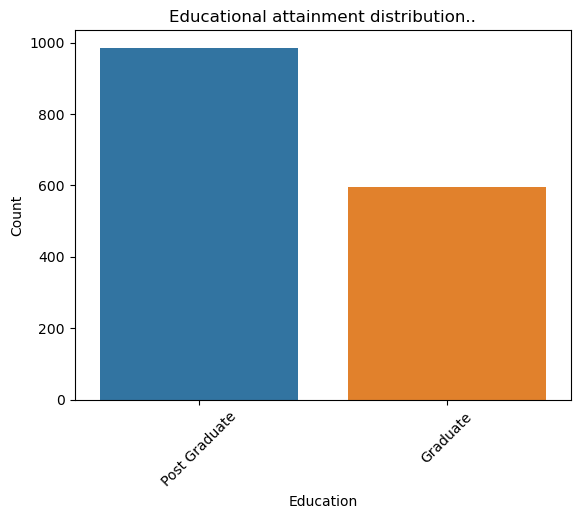

In [189]:
sns.countplot(x=df['Education'])
plt.title('Educational attainment distribution..')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=45) 
plt.show()

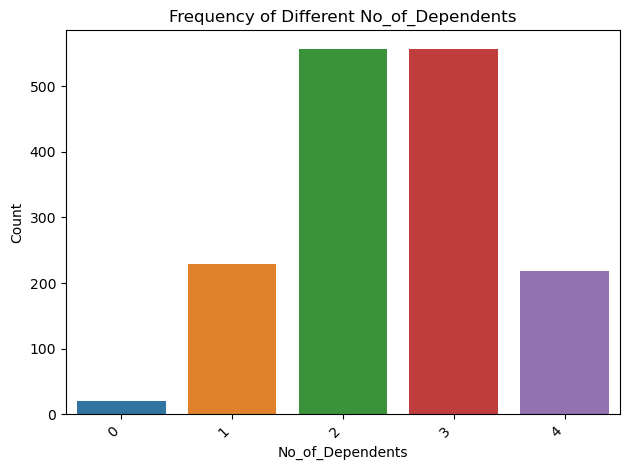

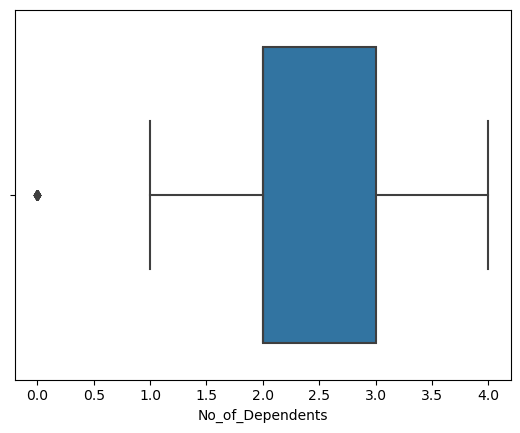

In [226]:
sns.countplot(x=df['No_of_Dependents'])
plt.title('Frequency of Different No_of_Dependents')
plt.xlabel('No_of_Dependents')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout() 
plt.show()
sns.boxplot(df, x='No_of_Dependents') ;

In [227]:
#Detect Outliers (Using IQR):
Q1 = df['No_of_Dependents'].quantile(0.25)
Q3 = df['No_of_Dependents'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [228]:
outliers = df[(df['No_of_Dependents'] < lower_bound) | (df['No_of_Dependents'] > upper_bound)]
print("Outliers:\n", outliers)

Outliers:
       Age  Gender Profession Marital_status      Education  No_of_Dependents  \
93     51    Male   Salaried         Single  Post Graduate                 0   
128    47  Female   Business         Single       Graduate                 0   
138    46  Female   Salaried         Single  Post Graduate                 0   
203    44    Male   Salaried         Single  Post Graduate                 0   
462    36  Female   Salaried         Single  Post Graduate                 0   
701    30    Male   Business         Single  Post Graduate                 0   
826    29    Male   Salaried         Single  Post Graduate                 0   
912    28    Male   Business         Single  Post Graduate                 0   
936    28    Male   Business         Single  Post Graduate                 0   
1020   27    Male   Salaried         Single  Post Graduate                 0   
1049   27    Male   Business         Single  Post Graduate                 0   
1133   26    Male   Business 

In [264]:
#Replacement with NaN:
df.loc[(df['No_of_Dependents'] < lower_bound) | (df['No_of_Dependents'] > upper_bound), 'No_of_Dependents'] = np.nan

In [267]:
#Verify Changes:
print("\nDataFrame after handling outliers:\n", df)


DataFrame after handling outliers:
       Age  Gender Profession Marital_status      Education  No_of_Dependents  \
0      53    Male   Business        Married  Post Graduate               4.0   
1      53  Female   Salaried        Married  Post Graduate               4.0   
2      53  Female   Salaried        Married  Post Graduate               3.0   
3      53  Female   Salaried        Married       Graduate               2.0   
4      53    Male   Salaried        Married  Post Graduate               3.0   
...   ...     ...        ...            ...            ...               ...   
1576   22    Male   Salaried         Single       Graduate               2.0   
1577   22    Male   Business        Married       Graduate               4.0   
1578   22    Male   Business         Single       Graduate               2.0   
1579   22    Male   Business        Married       Graduate               3.0   
1580   22    Male   Salaried        Married       Graduate               4.0   

  

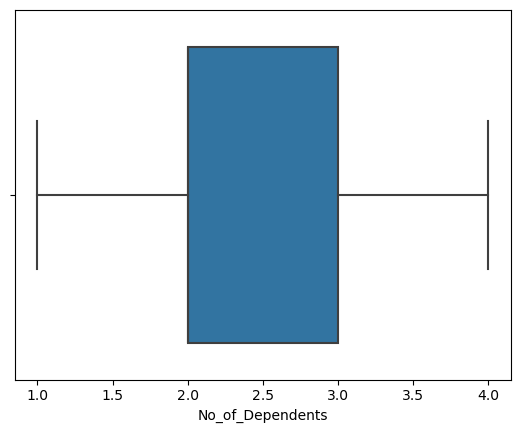

In [268]:
sns.boxplot(df, x='No_of_Dependents') ;

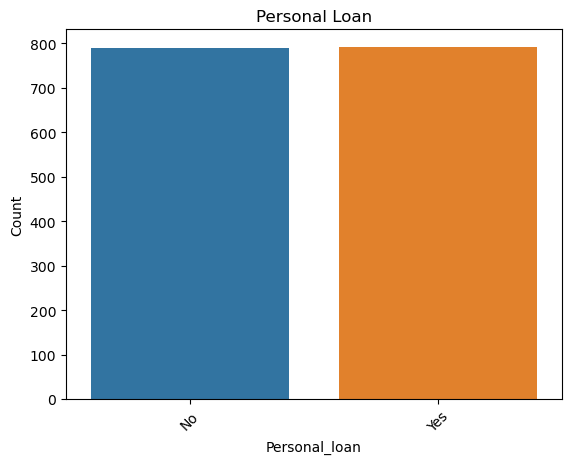

In [203]:
sns.countplot(x=df['Personal_loan'])
plt.title('Personal Loan')
plt.xlabel('Personal_loan')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

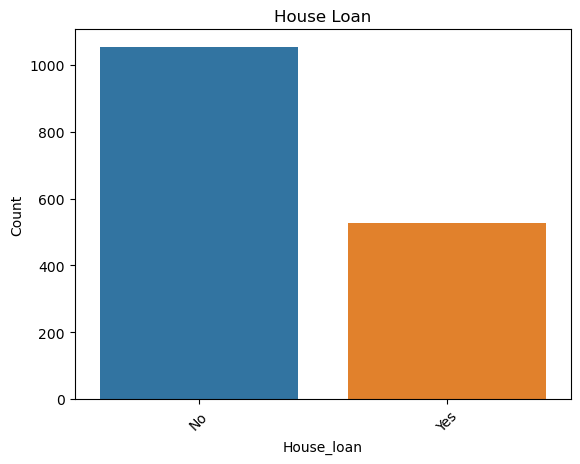

In [263]:
sns.countplot(x=df['House_loan'])
plt.title('House Loan')
plt.xlabel('House_loan')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

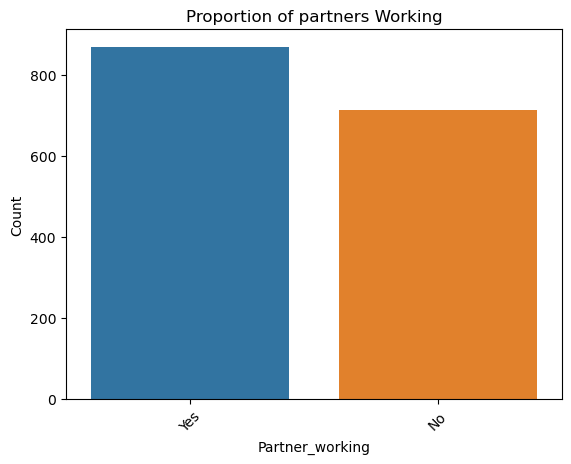

In [218]:
sns.countplot(x=df['Partner_working'])
plt.title('Proportion of partners Working')
plt.xlabel('Partner_working')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



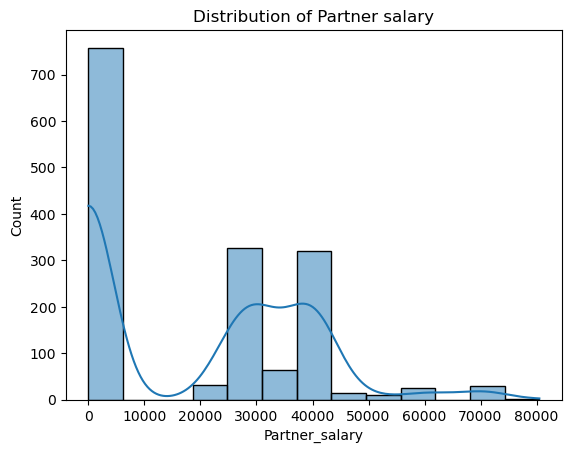

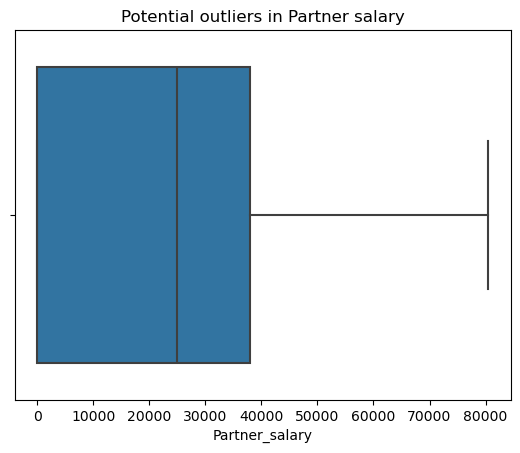

In [258]:
sns.histplot(df['Partner_salary'], kde=True)
plt.title('Distribution of Partner salary')
plt.show()
sns.boxplot(x=df['Partner_salary'])
plt.title('Potential outliers in Partner salary')
plt.xlabel('Partner_salary')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



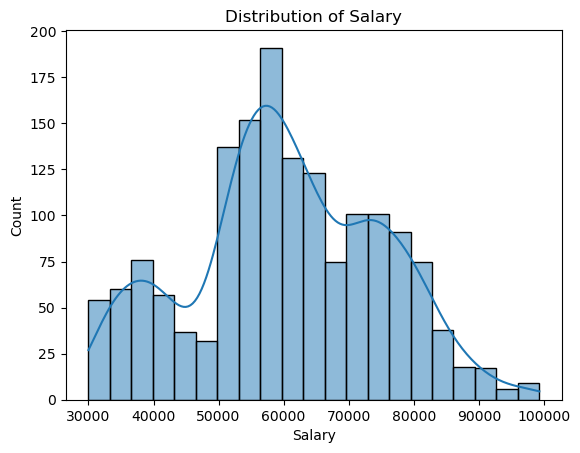

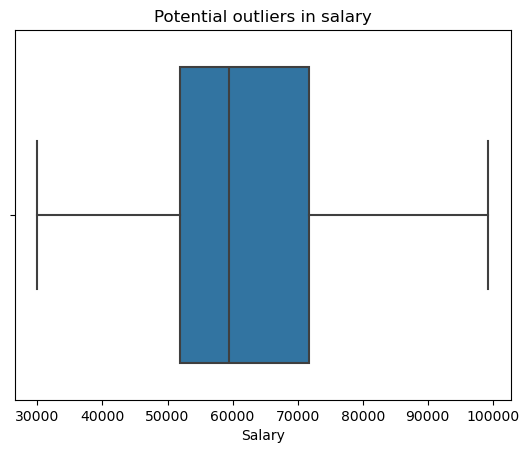

In [222]:
sns.histplot(df['Salary'], kde=True)
plt.title('Distribution of Salary')
plt.show()
sns.boxplot(x=df['Salary'])
plt.title('Potential outliers in salary')
plt.xlabel('Salary')
plt.show()

In [ ]:
Observations on Total_salary

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



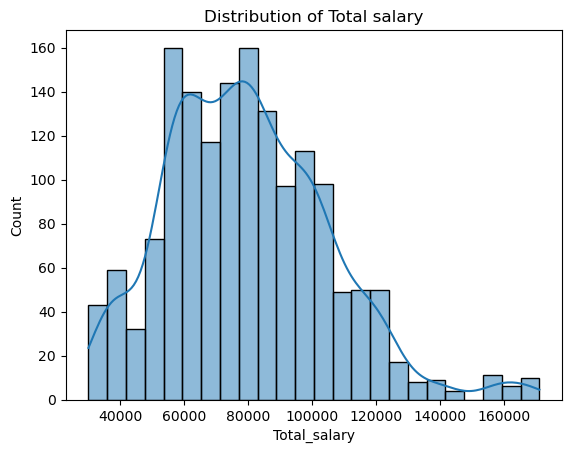

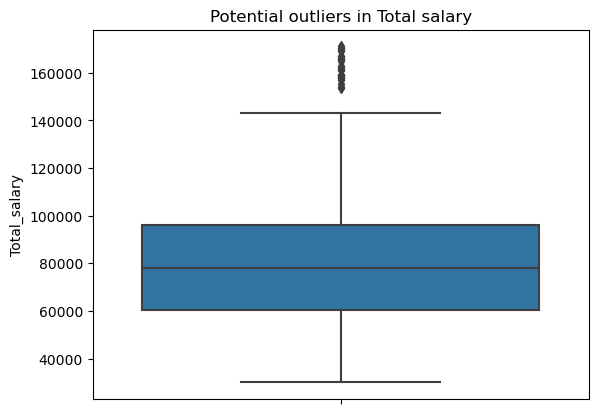

In [262]:
sns.histplot(df['Total_salary'], kde=True)
plt.title('Distribution of Total salary')
plt.show()
sns.boxplot(y=df['Total_salary'])
plt.title('Potential outliers in Total salary')
plt.ylabel('Total_salary')
plt.show()

In [270]:
#Detect Outliers (Using IQR):
Q1 = df['Total_salary'].quantile(0.25)
Q3 = df['Total_salary'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [271]:
outliers = df[(df['Total_salary'] < lower_bound) | (df['Total_salary'] > upper_bound)]
print("Outliers:\n", outliers)

Outliers:
      Age  Gender Profession Marital_status      Education  No_of_Dependents  \
0     53    Male   Business        Married  Post Graduate               4.0   
1     53  Female   Salaried        Married  Post Graduate               4.0   
2     53  Female   Salaried        Married  Post Graduate               3.0   
17    49  Female   Salaried        Married  Post Graduate               4.0   
18    49  Female   Business        Married  Post Graduate               3.0   
19    49    Male   Salaried        Married  Post Graduate               3.0   
29    46  Female   Salaried        Married  Post Graduate               2.0   
30    46    Male   Salaried        Married  Post Graduate               4.0   
31    46    Male   Business        Married       Graduate               2.0   
41    53  Female   Salaried        Married  Post Graduate               4.0   
42    52  Female   Salaried        Married  Post Graduate               3.0   
49    52  Female   Business        Marrie

In [272]:
#Replacement with NaN:
df.loc[(df['Total_salary'] < lower_bound) | (df['Total_salary'] > upper_bound), 'Total_salary'] = np.nan

In [273]:
#Verify Changes:
print("\nDataFrame after handling outliers:\n", df)


DataFrame after handling outliers:
       Age  Gender Profession Marital_status      Education  No_of_Dependents  \
0      53    Male   Business        Married  Post Graduate               4.0   
1      53  Female   Salaried        Married  Post Graduate               4.0   
2      53  Female   Salaried        Married  Post Graduate               3.0   
3      53  Female   Salaried        Married       Graduate               2.0   
4      53    Male   Salaried        Married  Post Graduate               3.0   
...   ...     ...        ...            ...            ...               ...   
1576   22    Male   Salaried         Single       Graduate               2.0   
1577   22    Male   Business        Married       Graduate               4.0   
1578   22    Male   Business         Single       Graduate               2.0   
1579   22    Male   Business        Married       Graduate               3.0   
1580   22    Male   Salaried        Married       Graduate               4.0   

  

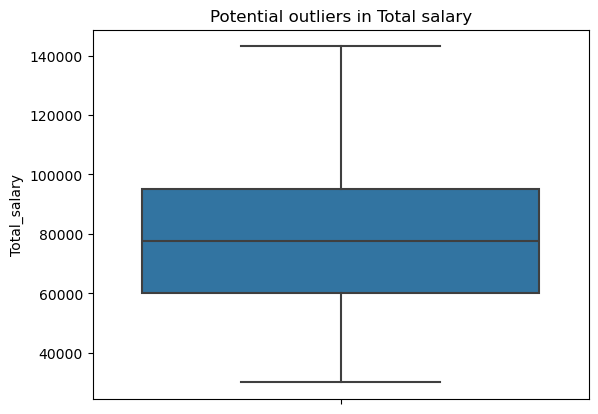

In [274]:
sns.boxplot(y=df['Total_salary'])
plt.title('Potential outliers in Total salary')
plt.ylabel('Total_salary')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



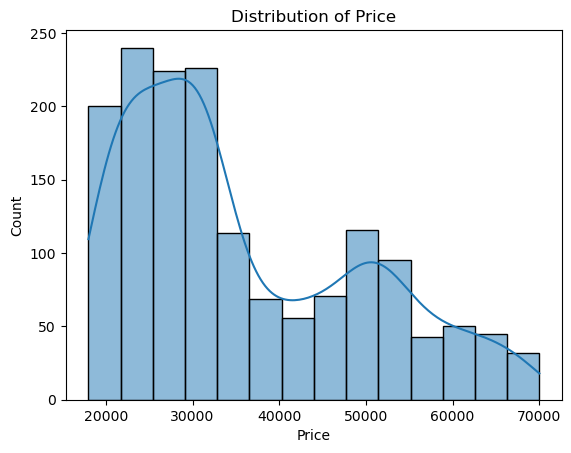

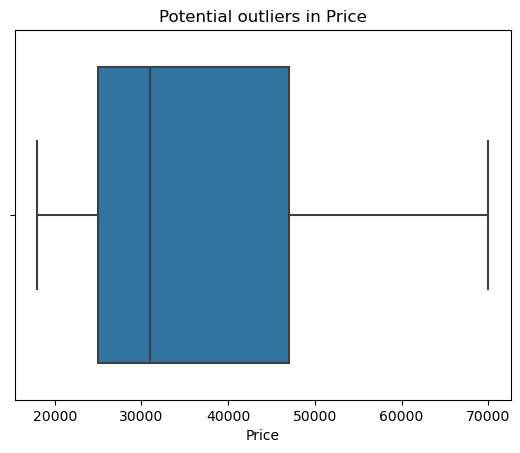

In [276]:
sns.histplot(df['Price'], kde=True)
plt.title('Distribution of Price')
plt.show()
sns.boxplot(x=df['Price'])
plt.title('Potential outliers in Price')
plt.xlabel('Price')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



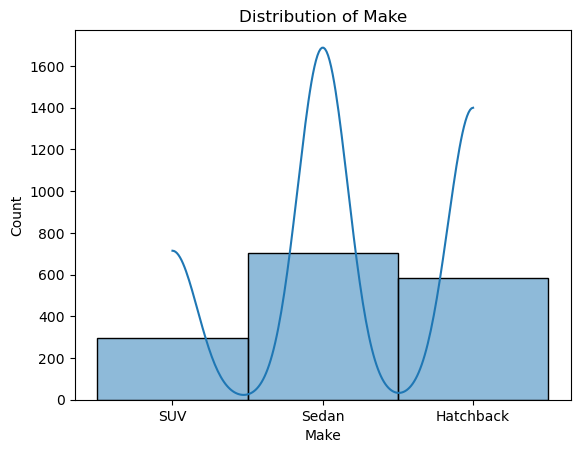

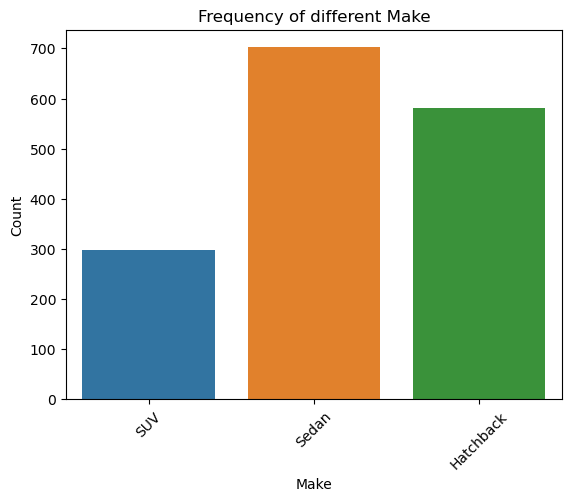

In [278]:
sns.histplot(df['Make'], kde=True)
plt.title('Distribution of Make')
plt.show()
sns.countplot(x=df['Make'])
plt.title('Frequency of different Make')
plt.xlabel('Make')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

## Bivariant Analysis

#### Numerical vs. Numerical:

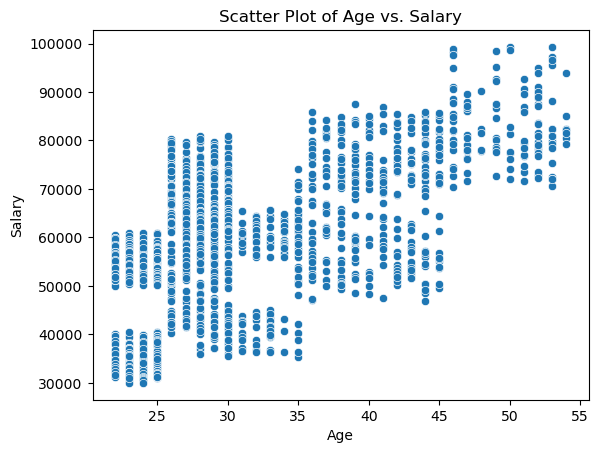

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



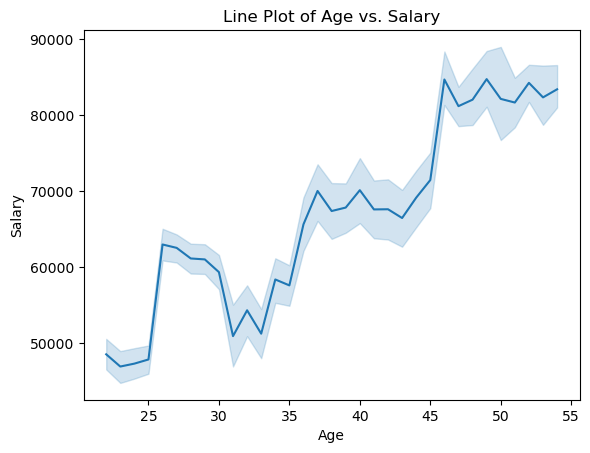

In [283]:
# Relationship between Age and Salary
sns.scatterplot(x='Age', y='Salary', data=df)
plt.title('Scatter Plot of Age vs. Salary')
plt.show()
sns.lineplot(x='Age', y='Salary', data=df)
plt.title('Line Plot of Age vs. Salary')
plt.show()

### Categorical vs. Numerical:

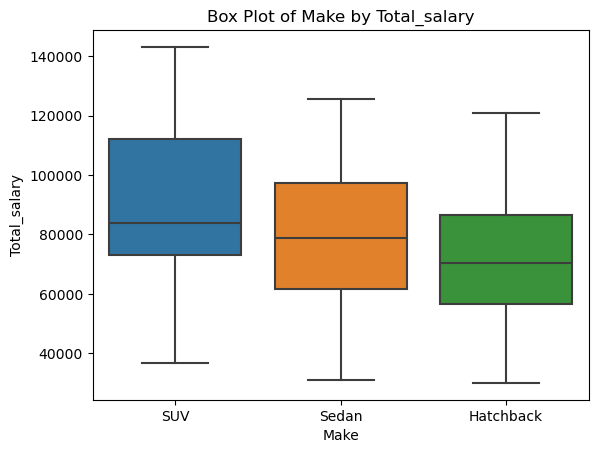

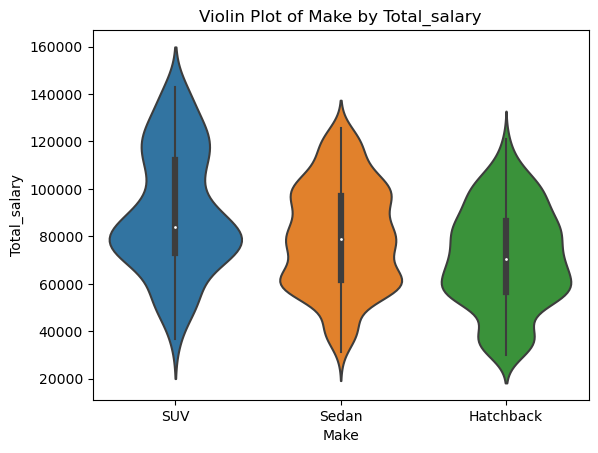

In [416]:
# Relationship between Make  and Total_salary
sns.boxplot(x='Make', y='Total_salary', data=df)
plt.title('Box Plot of Make by Total_salary')
plt.show()
sns.violinplot(x='Make', y='Total_salary', data=df)
plt.title('Violin Plot of Make by Total_salary')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



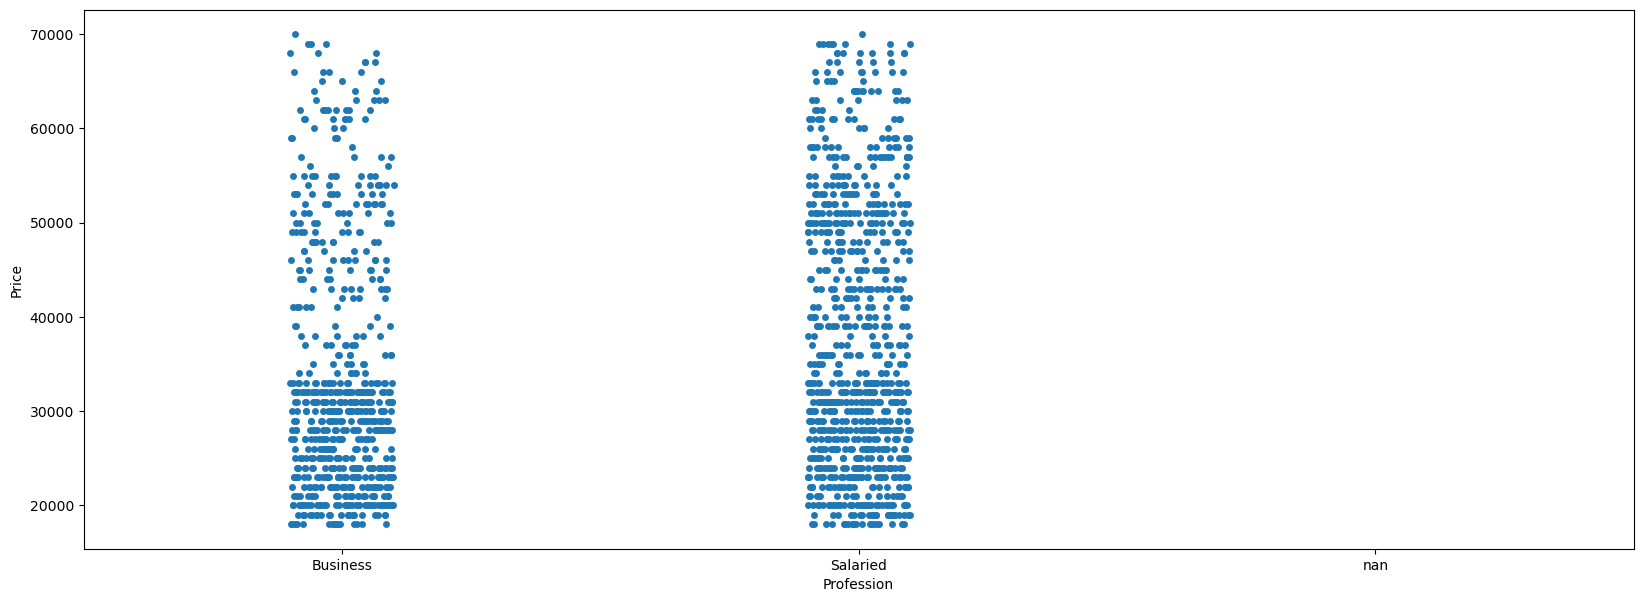

In [593]:
# Relationship between Profession and TPrice
plt.figure(figsize=(20,7))
sns.stripplot(data=df, x='Profession', y='Price',jitter=True);

### Categorical vs. Categorical:

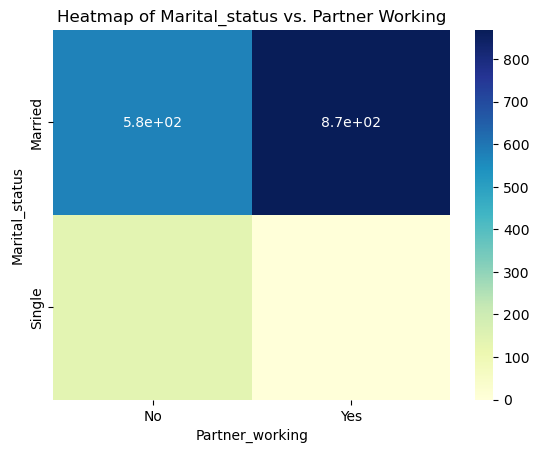

In [603]:
# Relationship between Marital_status and Partner_working
contingency_table = pd.crosstab(df['Marital_status'], df['Partner_working'])
sns.heatmap(contingency_table, annot=True, cmap='YlGnBu')
plt.title('Heatmap of Marital_status vs. Partner Working')
plt.show()

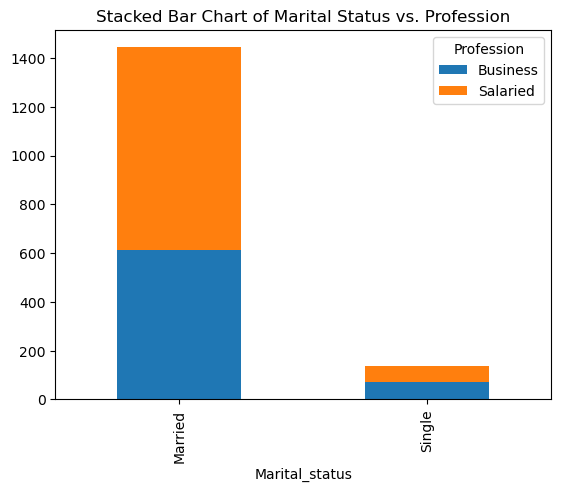

In [328]:
#stacked bar chart of marital status and profession
contingency_table = pd.crosstab(df['Marital_status'], df['Profession'])
contingency_table.plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs. Profession')
plt.show()

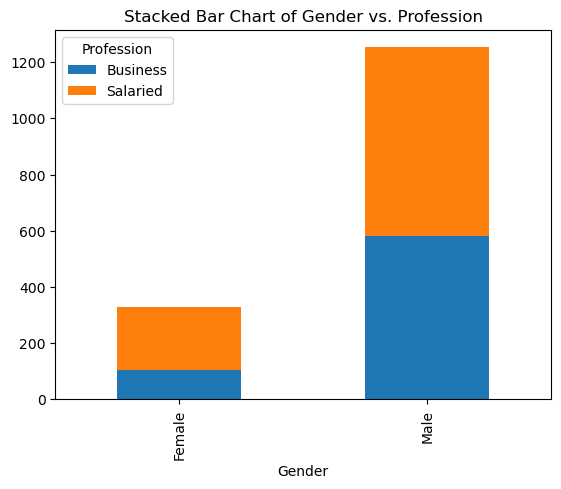

In [414]:
#stacked bar chart of Gender and profession
contingency_table = pd.crosstab(df['Gender'], df['Profession'],)
contingency_table.plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Gender vs. Profession')
plt.show()

### Multivariant Analysis

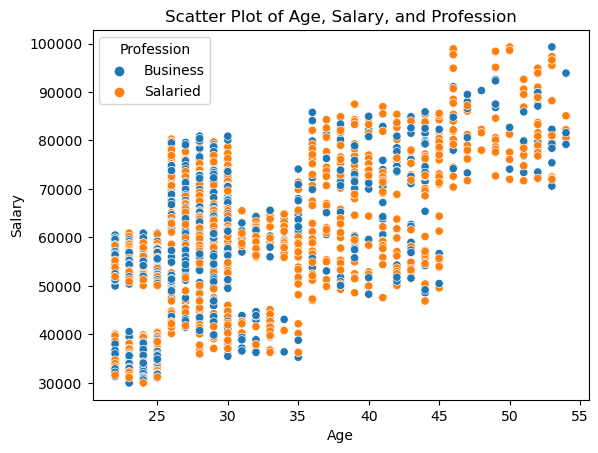

In [413]:
# Relationship between Age, Salary, and Profession
sns.scatterplot(x='Age', y='Salary', hue='Profession', data=df)
plt.title('Scatter Plot of Age, Salary, and Profession')
plt.show()

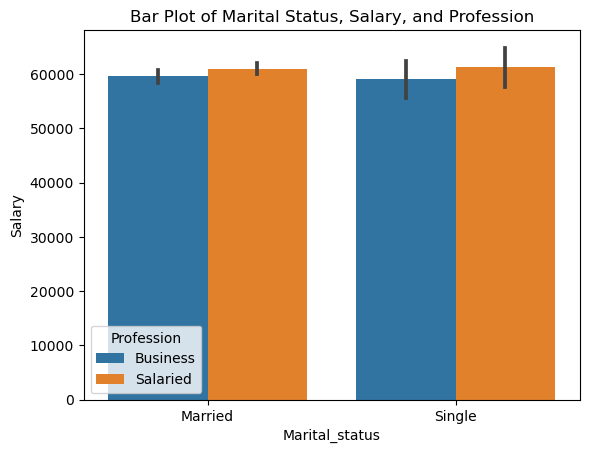

In [338]:
# Relationship between Marital_status, Salary, and Profession
sns.barplot(x='Marital_status', y='Salary', hue='Profession', data=df)
plt.title('Bar Plot of Marital Status, Salary, and Profession')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a

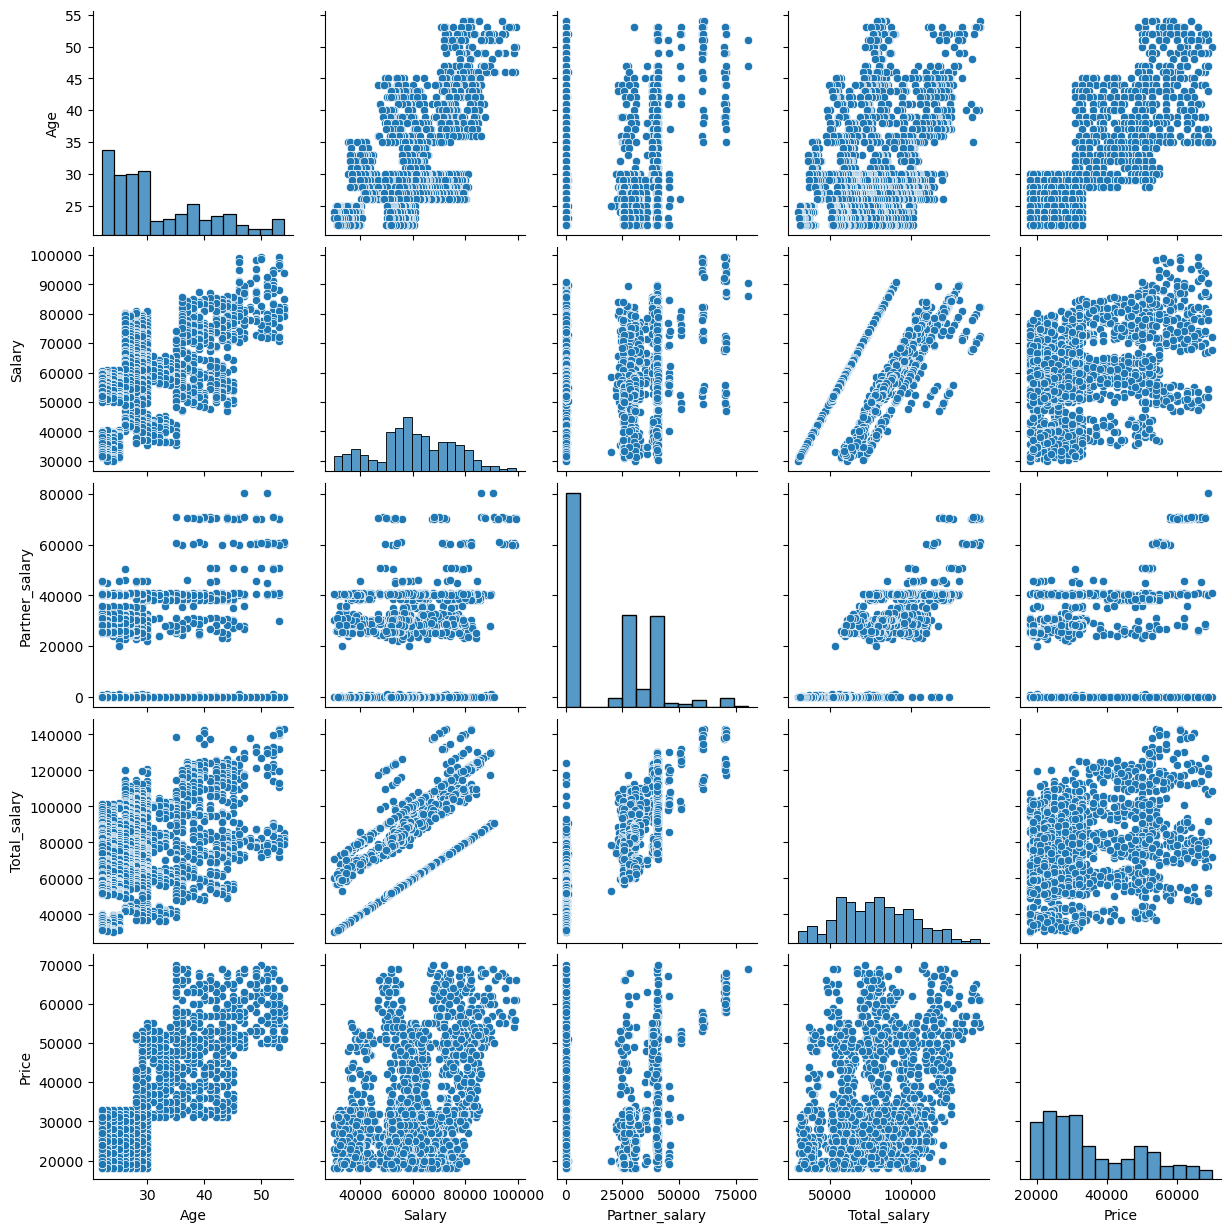

In [339]:
# Relationship between Age, Salary, Partner_salary, Total_salary and Price
sns.pairplot(df[['Age', 'Salary', 'Partner_salary', 'Total_salary', 'Price']])
plt.show()

### Categorical vs. Categorical vs. Numerical:

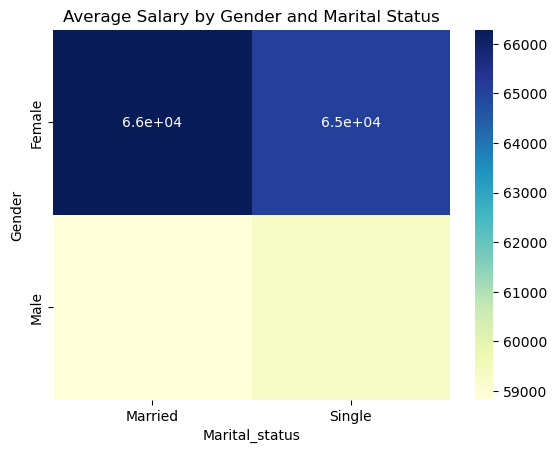

In [604]:
# Relationship between Average Salary by Gender and Marital Status
pivot_table = df.pivot_table(values='Salary', index='Gender', columns='Marital_status', aggfunc='mean')
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu')
plt.title('Average Salary by Gender and Marital Status')
plt.show()

### Numerical vs. Numerical vs. Numerical:

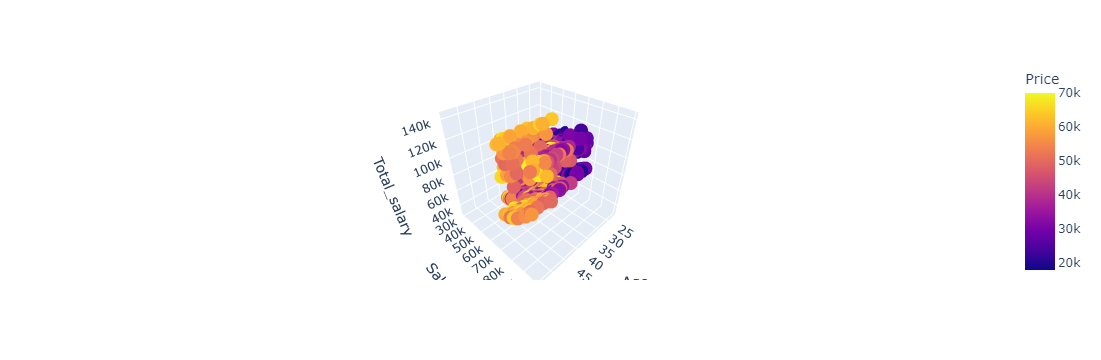

In [605]:
# Relationship between Age,Salary,Total_salary and Price 
fig3d= px.scatter_3d(df, x='Age', y='Salary', z='Total_salary', color='Price')
fig3d.show()

## Key Questions

### Question 1. Do men tend to prefer SUVs more compared to women? 

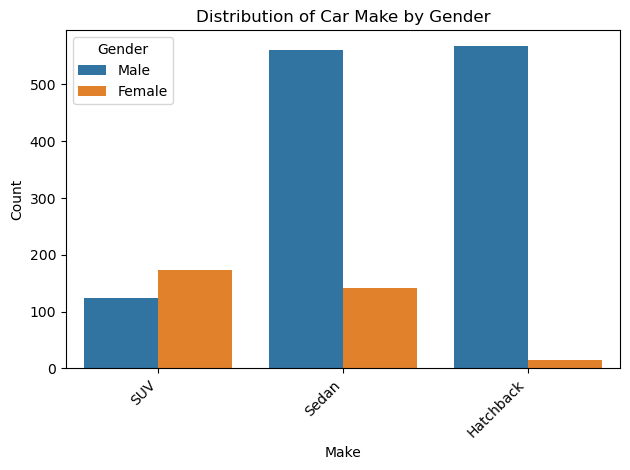

In [606]:
#Distribution of Car Make by Gender
sns.countplot(x='Make', hue='Gender', data=df)
plt.title('Distribution of Car Make by Gender')
plt.xlabel('Make')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout() 
plt.show()

### Question 2. What is the likelihood of a salaried person buying a Sedan? 

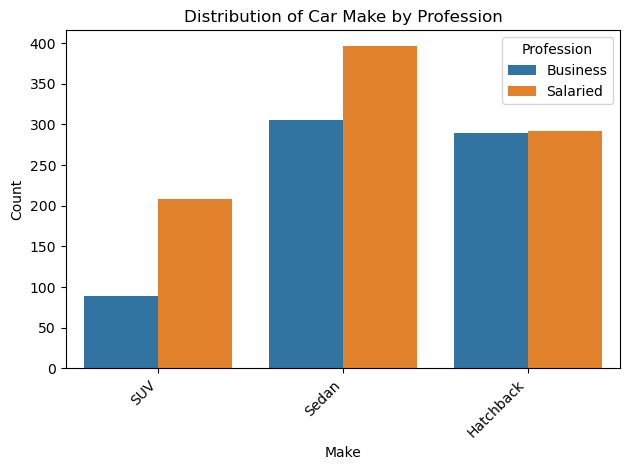

In [607]:
#Distribution of Car Make by Profession
sns.countplot(x='Make', hue='Profession', data=df)
plt.title('Distribution of Car Make by Profession')
plt.xlabel('Make')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout() 
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a

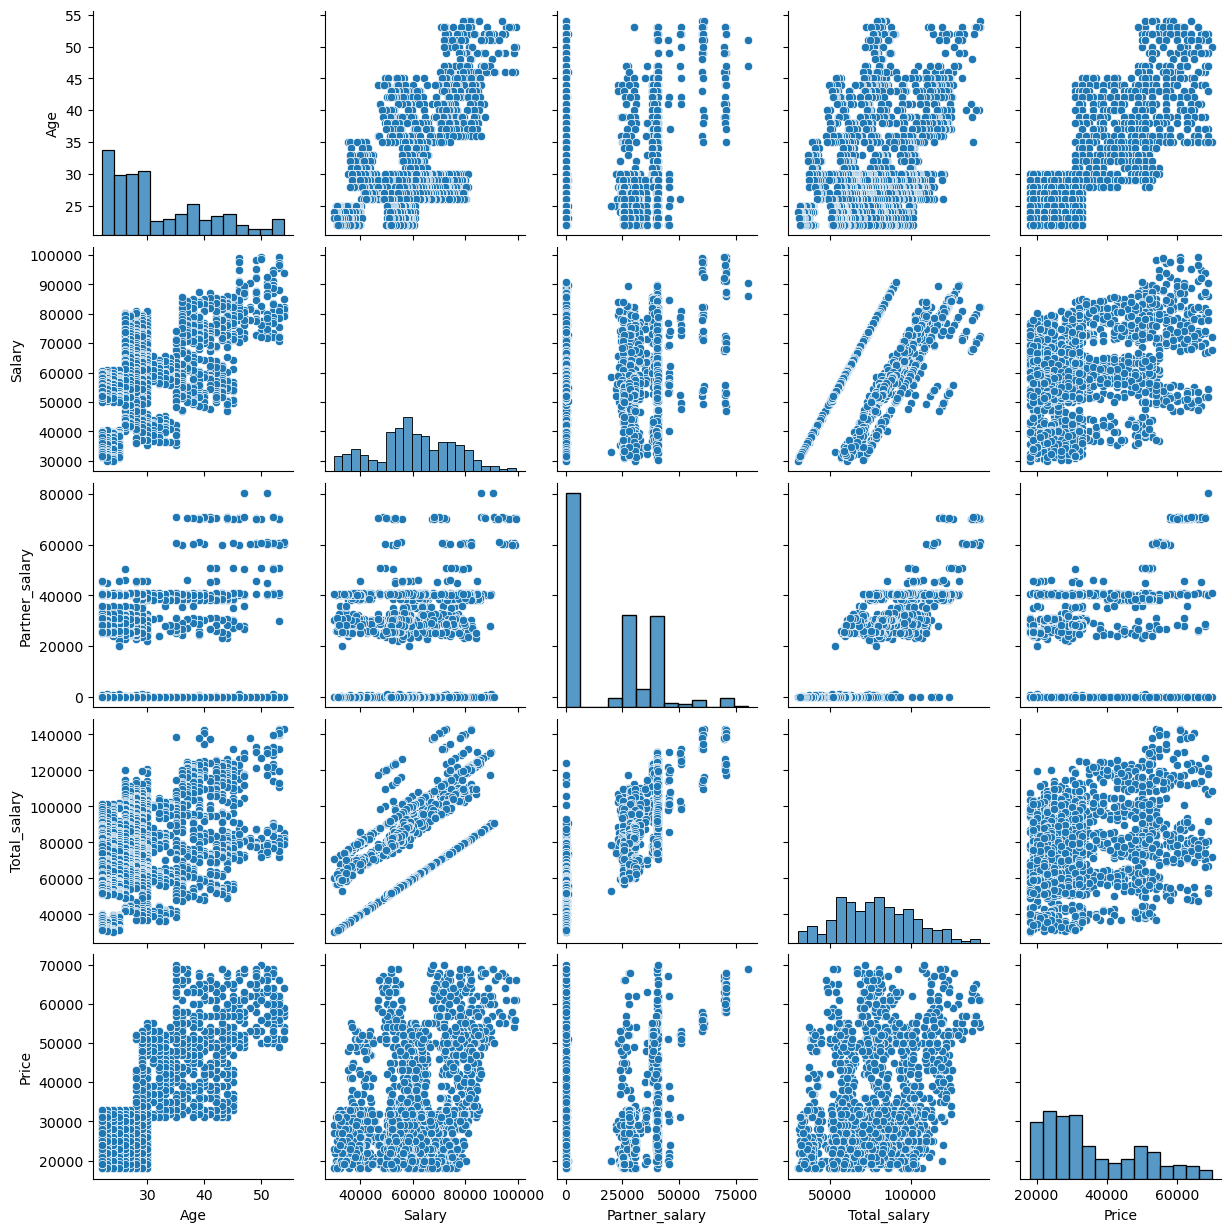

In [608]:
# Relationship between Age, Salary, Partner_salary, Total_salary and Price
sns.pairplot(df[['Age', 'Salary', 'Partner_salary', 'Total_salary', 'Price']])
plt.show()

### Question 3. What evidence or data supports Sheldon Cooper's claim that a salaried male is an easier target for a SUV sale over a Sedan sale?

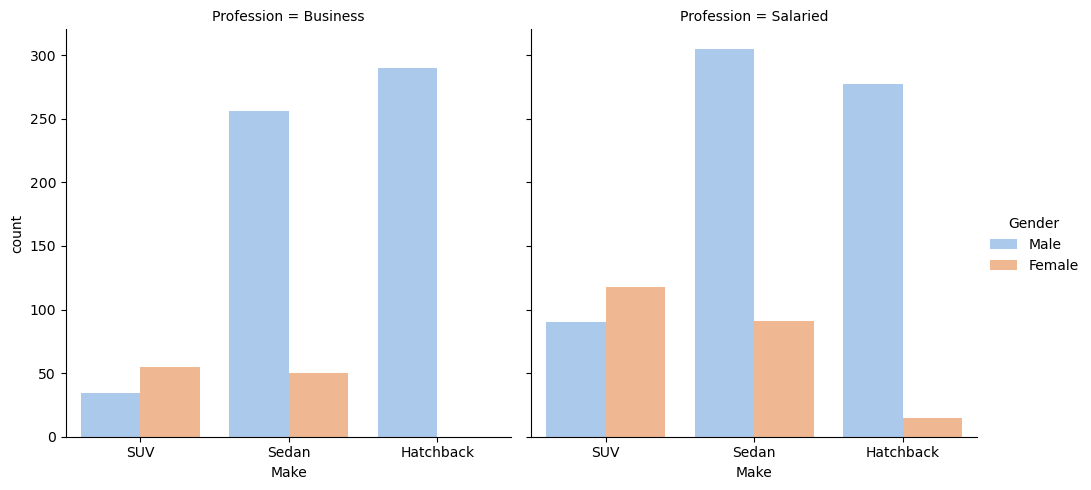

In [609]:
# Relationship between Profession,Make and Gender
sns.catplot(data=df, x="Make", hue="Gender", col="Profession", kind='count', palette='pastel')

### Question 4. How does the amount spent on purchasing automobiles vary by gender? 

In [610]:
#The amount spent on purchasing automobiles vary by gender
price_sum = df.groupby(['Make', 'Gender'])['Price'].sum()

print(price_sum)

Make       Gender
Hatchback  Female      412000.0
           Male      14996000.0
SUV        Female     9252000.0
           Male       7328000.0
Sedan      Female     6031000.0
           Male      18261000.0
Name: Price, dtype: float64


In [451]:
price_sum_table=price_sum.unstack()

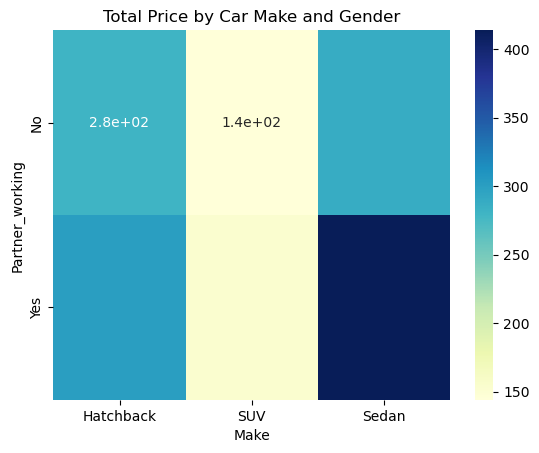

In [611]:
# Relation between Make, Gender and Price
sns.heatmap(price_sum_table, annot=True, cmap='YlGnBu')
plt.title('Total Price by Car Make and Gender')
plt.show()

### Question 5. How much money was spent on purchasing automobiles by individuals who took a personal loan? 

In [613]:
# Money was spent on purchasing automobiles by individuals who took a personal loan
price_sum = df.groupby(['Personal_loan', 'Make'])['Price'].sum()

print(price_sum)

Personal_loan  Make     
No             Hatchback     7765000.0
               SUV          10373000.0
               Sedan        10852000.0
Yes            Hatchback     7643000.0
               SUV           6207000.0
               Sedan        13440000.0
Name: Price, dtype: float64


In [455]:
price_sum_table=price_sum.unstack()

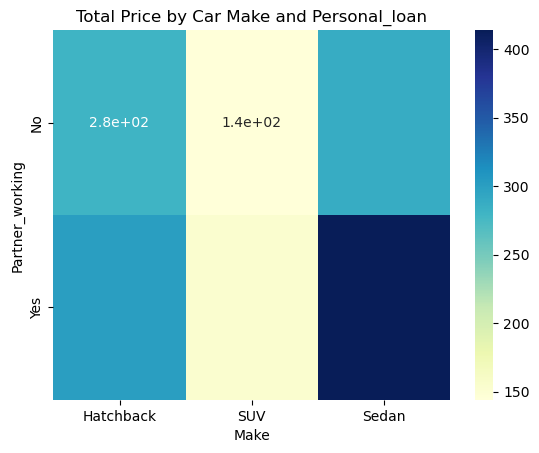

In [614]:
# Relation between Make, Personal_loan and Price
sns.heatmap(price_sum_table, annot=True, cmap='YlGnBu')
plt.title('Total Price by Car Make and Personal_loan')
plt.show()

### Question 6. How does having a working partner influence the purchase of higher-priced cars?

In [615]:
# working partner influence the purchase of higher-priced cars
avg_price_by_group = df.groupby(['Partner_working', 'Make'])['Price'].mean()
print(avg_price_by_group)

Partner_working  Make     
No               Hatchback    26323.843416
                 SUV          56173.611111
                 Sedan        35354.166667
Yes              Hatchback    26614.617940
                 SUV          55496.732026
                 Sedan        34082.125604
Name: Price, dtype: float64


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



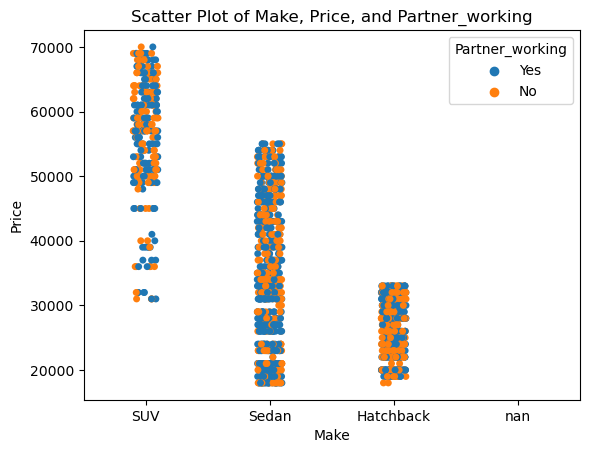

In [616]:
# Relation between Make , Price, Partner_working
sns.stripplot(x='Make', y='Price', hue='Partner_working', data=df)
plt.title('Scatter Plot of Make, Price, and Partner_working')
plt.show()

## Actionable Insights and Recommendations

### Actionable Insights:

### Recommendations: